In [18]:
# Needed libraries
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from datetime import datetime
import time
# physical_devices = tf.config.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
#     print("Memory growth set for GPU.")
# else:
#     print("No GPU found. Running on CPU.")

In [19]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()


In [20]:
print(x_train.shape)

(60000, 28, 28)


In [21]:
print(y_train.shape)

(60000,)


In [22]:
# To train in model -- Need to flatten the x_train by reshaping it 
x_train = x_train.reshape(-1,784).astype("float32") / 255.0
x_test = x_test.reshape(-1,784).astype("float32") / 255.0

# x_train = tf.convert_to_tensor(x_train)

In [29]:
# Sequential API -- Very convenient, NOt very flexible (One input -- one output)
print("Datetime: ",datetime.now())
model = keras.Sequential(
    [
        keras.Input(shape=(28*28)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10),
    ]
)
## Below way we can add summary at any line to look output
# model = keras.Sequential()
# model.add(keras.Input(shape=(784)))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(10))

# import sys
# sys.exit()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_train, y_train, batch_size=32, verbose=2)
print("Datetime: ",datetime.now())

Datetime:  2025-07-23 16:18:36.604828
Epoch 1/5
1875/1875 - 18s - loss: 0.1848 - accuracy: 0.9432 - 18s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 20s - loss: 0.0792 - accuracy: 0.9755 - 20s/epoch - 11ms/step
Epoch 3/5
1875/1875 - 18s - loss: 0.0540 - accuracy: 0.9831 - 18s/epoch - 10ms/step
Epoch 4/5
1875/1875 - 18s - loss: 0.0413 - accuracy: 0.9864 - 18s/epoch - 10ms/step
Epoch 5/5
1875/1875 - 18s - loss: 0.0328 - accuracy: 0.9892 - 18s/epoch - 10ms/step
1875/1875 - 7s - loss: 0.0310 - accuracy: 0.9903 - 7s/epoch - 4ms/step
Datetime:  2025-07-23 16:20:16.760146


In [31]:
# Functional API (A bit more flexible)
inputs = keras.Input(shape=(784))
x = layers.Dense(512, activation='relu', name= 'first_layer')(inputs)
x = layers.Dense(256, activation='relu', name= 'second_layer')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 first_layer (Dense)         (None, 512)               401920    
                                                                 
 second_layer (Dense)        (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [36]:
# Sequential APIs
model = keras.Sequential()
model.add(keras.Input(shape=(784)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu', name='my_layer'))
model.add(layers.Dense(10))

model = keras.Model(inputs=model.inputs,
                    outputs=[model.get_layer('my_layer').output])

feature = model.predict(x_train)
print(feature.shape)

print(model.summary())

1875/1875 [==============================] - 5s 3ms/step
(60000, 256)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 my_layer (Dense)            (None, 256)               131328    
                                                                 
Total params: 533248 (2.03 MB)
Trainable params: 533248 (2.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


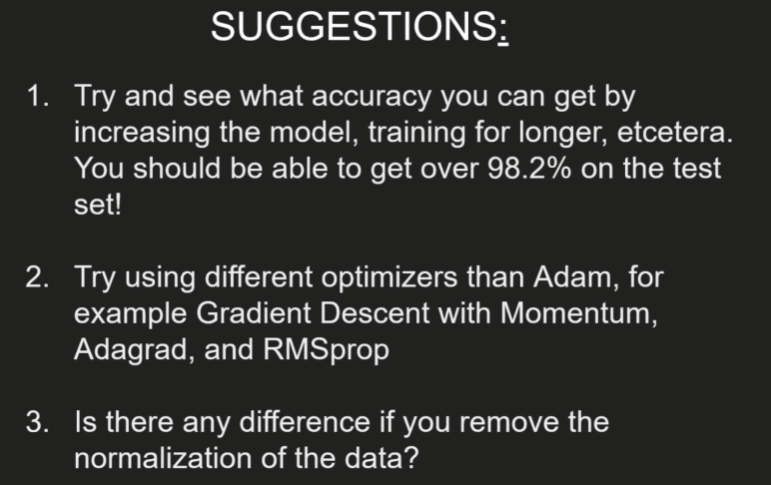